# Exercise 1

Six independent observations from a Gaussian distribution $N(\mu, \sigma^{2})$ are given by {1.017, 2.221, 1.416, 0.641, 0.124, 1.728}. If $\sigma=0.75$ is known, find the symmetric confidence intervals for $\mu$ with confidence levels $1-\alpha$ = 0.68, 0.90, and 0.95, respectively.

### Case 1: $\sigma$ is known

In [1]:
%matplotlib inline
import numpy as np
import math
import scipy.stats as stat # extra statistical functions (the basic are included in numpy)
import scipy.optimize as opt # optimization and root finding package 
import scipy.misc as msc
import matplotlib.pyplot as plt

In [74]:
def find_delta(delta, alpha, sigma):
    x = math.erf(delta/(np.sqrt(2)*sigma)) -1 + alpha
    return x



If sigma is known, then:

In [75]:
obs = [1.1017, 2.221, 1.416, 0.641, 0.124, 1.728]
alpha = 1-np.array([0.68, 0.90, 0.95])
sigma_real = 0.75
opt_delta = np.empty(len(alpha))
mu=np.mean(obs)
print "Mu:", mu
print ""

for i in range(len(alpha)):
    opt_delta[i] = opt.fsolve(find_delta, sigma_real, args=(alpha[i],sigma_real))
    print "Delta:", opt_delta[i]
    print 'Interval [mu-delta, mu+delta]', mu-opt_delta[i], mu+opt_delta[i] 


Mu: 1.20528333333

Delta: 0.745843412407
Interval [mu-delta, mu+delta] 0.459439920926 1.95112674574
Delta: 1.23364022021
Interval [mu-delta, mu+delta] -0.0283568868803 2.43892355355
Delta: 1.46997298841
Interval [mu-delta, mu+delta] -0.264689655072 2.67525632174


 ### Case 2: $\sigma$ is unknown. 

If we did not have sigma, we would first estimate it and use this estimate as our actual value. The resulting confidence intervals would be an estimation of the real confidence intervals shown above. The code below takes sigma as the std of the measurements.

In [18]:
obs = [1.1017, 2.221, 1.416, 0.641, 0.124, 1.728]
alpha = 1-np.array([0.68, 0.90, 0.95])
sigma_estimated = np.std(obs)

opt_delta_estimated = np.empty(len(alpha))
mu=np.mean(obs)
print "Mu = %g and Sigma = %g" %(mu, sigma_estimated)
print ""

for i in range(len(alpha)):
    opt_delta_estimated[i] = opt.fsolve(find_delta, sigma_estimated, args=(alpha[i],sigma_estimated))
    
    #if our estimated delta was the true one, our results would match the values in the alpha array.
    print "1-alpha = %.3f" %math.erf(opt_delta_estimated[i]/(np.sqrt(2)*sigma_real)) 
    
    print "Delta = ", opt_delta[i]
    print 'Interval [mu-delta, mu+delta]', mu-opt_delta[i], mu+opt_delta[i] 

Mu = 1.20528 and Sigma = 0.688916

1-alpha = 0.639
Delta =  0.745843412407
Interval [mu-delta, mu+delta] 0.459439920926 1.95112674574
1-alpha = 0.869
Delta =  1.23364022021
Interval [mu-delta, mu+delta] -0.0283568868803 2.43892355355
1-alpha = 0.928
Delta =  1.46997298841
Interval [mu-delta, mu+delta] -0.264689655072 2.67525632174


# Exercise 2

Let's imagine that an LHC experiment measures the number ofe vents produced in a certain decay channel of the Higgs particle. Let's call $\nu$ the expected number of events, assuming there is no background. Then, the probability to measure exactly $N$ events in an experiment is given by the Poisson probability distribution:

## Part 1

(a) Check that $P(N; \nu)$ is properly normalized.

$$P(N,\nu)= \frac{\nu^{N}}{N!} e^{-\nu}$$

$$E[N]=\sum_{n=0}^\infty nP(n;\nu)=\sum_{n=1}^\infty n \frac{\nu^{n}}{n!} e^{-\nu}= \nu \sum_{n=1}^\infty \frac{\nu^{n-1}}{(n-1)!} e^{-\nu}= \nu \sum_{n=0}^\infty \frac{\nu^{m}}{m!} e^ {-\nu}= \nu e^{\nu} e^{-\nu}= \nu$$ 

where m=n-1,n=1 and m=0 

$$E[N(N-1)]= \sum_{n=0}^\infty n(n-1) P(n;\nu)= \sum_{n=2}^\infty n(n-1) \frac{\nu^{n}}{n!} e^{-\nu}= e^{-\nu} \nu^{2} \sum_{n=2}^\infty \frac{\nu^{n-2}}{(n-2)!}= e^{-\nu} \nu^{2}\nu= \nu^{2}$$

$$E[N(N-1)]= E[N^{2}]-E[N]\rightarrow E[N^{2}]= E[N(N-1)]+ E[N]= \nu^{2}+\nu$$

$$Var[N]= E[N^{2}]-(E[N])^{2}= \nu^{2}+\nu-\nu^{2}= \nu$$

$$\hat{\nu}_{ML}= \frac{1}{n} \sum_{i=1}^{n} N_{i}$$

$$Var[\hat{\nu}_{ML}]= Var[\frac{1}{n} \sum_{i=1}^{N} N_{i}]= \frac{1}{n^{2}} \sum_{i=1}^{n} Var[N_{i}]= \frac{1}{n^{2}} n \nu= \frac{\nu}{n}$$

$Var[N_{i}]= \nu$

(b) Given an observed value of $N (=N_{obs})$, find a frequentist unbiased esitmator for $\nu$. Compute its expected value and variance. 

$$
P(N;\nu)=\frac{\nu^{N}}{N!}e^{-\nu}\\
L\left(\left\{ N_{i}\right\} ;\nu\right)=\Pi_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!}e^{-\nu}=e^{-\nu m}\Pi_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!}\\
P\left(\left\{ N_{i}\right\} ;\nu\right)=-\log L=-\left(-\nu_{m}+\sum N_{i}\log\nu-\sum\log N_{i}!\right)=\nu_{m}-\sum N_{i}\log\nu-\sum\log N_{i}!\\
\frac{\partial P}{\partial\nu}|_{\nu=\hat{\nu}ML}=m-\sum\frac{N_{i}}{\hat{\nu}_{ML}}=0\rightarrow\hat{\nu}_{ML}=\frac{1}{m}\sum_{i=1}^{m}N_{i}\\
\left\langle \hat{\nu}_{ML}\right\rangle =\left\langle \frac{1}{m}\sum N_{i}\right\rangle =\frac{1}{m}\sum\left\langle N_{i}\right\rangle =\frac{1}{m}\sum\left\langle N\right\rangle =\frac{1}{m}\sum\nu=\nu.
$$


where $m$ is the number of observations. En la ultima ecuación, falta demostrar que la esperanza de N (i.e.$\left\langle N\right\rangle$) es igual a $\nu$. 

### Part II

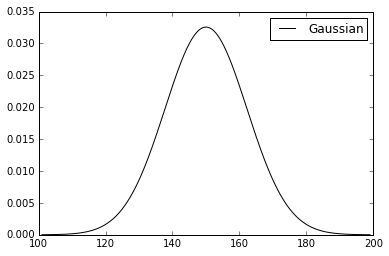

In [122]:
observed_values = np.array([150])
num_observations = len(observed_values)

nu_estimated = np.mean(observed_values)


# Expected gaussian pdf
mu = nu_estimated
sigma = np.sqrt(nu_estimated)
dist = stat.norm(mu, sigma)
x_pdf = np.linspace(mu-4*sigma, mu+4*sigma, 1000)

#Plot distributions
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')
ax.legend()


### Part III

150.0
Variance of MC sample: 150.005580455


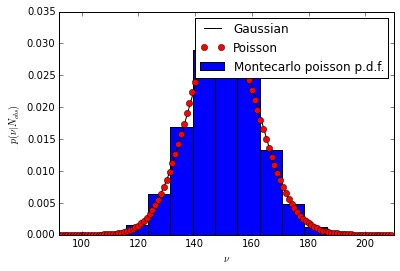

In [123]:
poisson = stat.poisson(nu_estimated)
print nu_estimated
N = 10**6
mc_sample = poisson.rvs(N)
x_pdf = np.linspace(min(mc_sample)*.8, max(mc_sample)*1.2, 1000)
x_pmf = np.arange(min(mc_sample), max(mc_sample)) # We use the pmf because the 
                                            # Poisson takes discrete values


fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f.')
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian')
ax.plot(x_pmf, poisson.pmf(x_pmf), 'ro', label = 'Poisson')
ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend()

print 'Variance of MC sample:', np.var(mc_sample) #The variance of a Poisson should be equal to nu_estimated

### Part IV

Assuming a prior for $\nu$ uniform between 0 and infinity, compute the Bayesian posterior pdf for $\nu$.

TO DO: Incorporar resolució Oriol.


$$
L\left(\left\{ N_{i}\right\} ;\nu\right)=\Pi_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!}e^{-\nu}=e^{-\nu m}\Pi_{i=1}^{m}\frac{\nu^{N_{i}}}{N_{i}!}\\
$$

Note that it is not a Gaussian. Plot the PDF for $N_{\text{obs}}$ and compare it with the results in II and III.


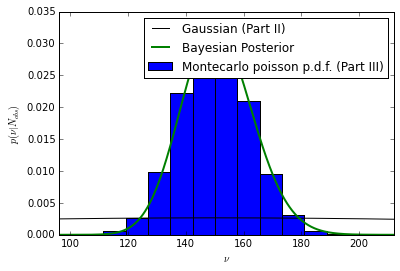

In [96]:
nu_pdf = np.linspace(min(mc_sample)*.8, max(mc_sample)*1.2, 1000)
Nobs = observed_values[0]

# nu_posterior = np.exp(-nu_pdf )*(nu_pdf**observed_values/msc.factorial(observed_values)) --> Treballarem amb logs per evitar overflow

log_nu_posterior = -nu_pdf + Nobs*np.log(nu_pdf) - np.log(msc.factorial(Nobs))
nu_posterior = np.exp(log_nu_posterior)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_pdf, dist.pdf(x_pdf), '-k', label = 'Gaussian (Part II)')
ax.hist(mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f. (Part III)')
ax.plot(nu_pdf, nu_posterior, 'g', lw=2, label = 'Bayesian Posterior')
#ax.plot(x_pmf, poisson.pmf(x_pmf), 'r', label = 'Poisson')

ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend()

### Part 5

In [116]:
N=10**7
nu_rndm = np.random.random(N)*(Nobs+10*np.sqrt(Nobs))
poisson = stat.poisson(nu_rndm)
N_mc = poisson.rvs(N) #We'll draw a sample from N_mc 
nu_mc_sample = nu_rndm[N_mc==Nobs] # Solo nos quedamos con los valores de nu en nu_rndm con los que al generar la Poisson, 
                                    # nos han dado, en el primer intento, que el de N_mc es igual a N_obs

(D)

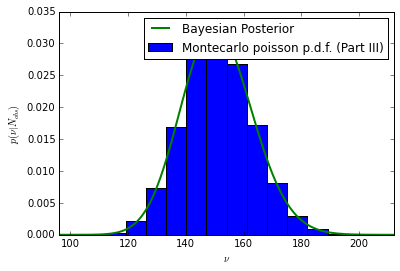

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(nu_mc_sample,color='b',normed=1,bins=15,label='Montecarlo poisson p.d.f. (Part III)')
ax.plot(nu_pdf, nu_posterior, 'g', lw=2, label = 'Bayesian Posterior')

ax.set_xlim([min(mc_sample), max(mc_sample)])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu|N_{obs})$')
ax.legend() 

In [118]:
print len(nu_mc_sample) #this is the number of values that we select from N_mc sample

36998


(E)

In [119]:
mu=np.mean(nu_mc_sample)
variance =np.var(nu_mc_sample) # equivalent to np.sqrt(np.var(nu_mc_sample))
skewness = stat.skew(nu_mc_sample)
kurtosis=stat.kurtosis(nu_mc_sample)

print 'The Montecarlo generated distribution has:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu, variance, skewness, kurtosis)

The Montecarlo generated distribution has:
	mean = 151.070964,
	variance = 150.097962,
	skewness = 0.134454
	and kurtosis = -0.005703


VI

Las dos celdas que siguen sirven para haver los apartados II-V, VI i VII de manera sintetizada. A bajo, los plots se pueden pesonalizar a gusto.

In [10]:
Nobs = 1
nu_grid = np.linspace(Nobs-4*np.sqrt(Nobs), Nobs+4*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV
log_nu_posterior = -nu_grid + Nobs*np.log(nu_grid) - np.log(msc.factorial(Nobs))
nu_posterior = np.exp(log_nu_posterior)

# Part V
N_V=10**7
nu_rndm = np.random.random(N_V)*(Nobs+10*np.sqrt(Nobs))
poisson_V = stat.poisson(nu_rndm)
N_mc = poisson_V.rvs(N_V) #We'll draw a sample from N_mc 
mc_sample_V = nu_rndm[N_mc==Nobs]

# Part V.E)
mu_VE = np.mean(mc_sample_V)
sigma_VE = np.std(mc_sample_V)
gaussian_VE = stat.norm(mu_VE, sigma_VE)

C:\Users\nao\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
C:\Users\nao\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  del sys.path[0]


(array([  2.73973045e-01,   3.13210923e-01,   1.77900652e-01,
          8.42226177e-02,   3.63274424e-02,   1.48142194e-02,
          5.77486516e-03,   2.32434822e-03,   8.39125713e-04,
          2.95044202e-04]),
 array([  7.98891763e-04,   1.10008379e+00,   2.19936870e+00,
          3.29865360e+00,   4.39793850e+00,   5.49722340e+00,
          6.59650831e+00,   7.69579321e+00,   8.79507811e+00,
          9.89436301e+00,   1.09936479e+01]),
 <a list of 10 Patch objects>)

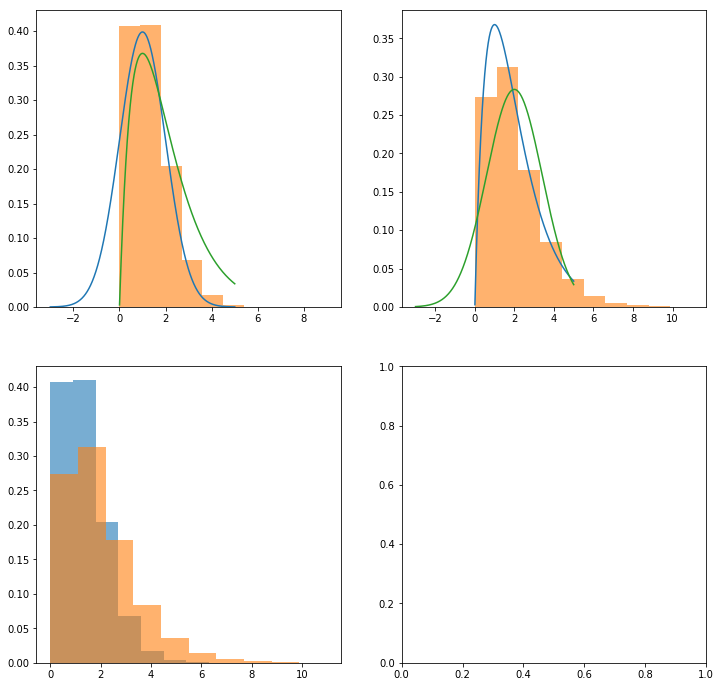

In [11]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(nu_grid,gaussian_II.pdf(nu_grid))
ax1.hist(mc_sample_III,alpha=0.6,normed=1)
ax1.plot(nu_grid,nu_posterior)

ax2.plot(nu_grid,nu_posterior)
ax2.hist(mc_sample_V, alpha=0.6, normed=1)
ax2.plot(nu_grid,gaussian_VE.pdf(nu_grid))

ax3.hist(mc_sample_III,alpha=0.6,normed=1)
ax3.hist(mc_sample_V, alpha=0.6, normed=1)



In [24]:
mu_V =np.mean(mc_sample_V)
variance_V =np.var(mc_sample_V) # equivalent to np.sqrt(np.var(mc_sampleV))
skewness_V = stat.skew(mc_sample_V)
kurtosis_V=stat.kurtosis(mc_sample_V)

print ('the moments for the MC simulatiom with linear prior are:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_V, variance_V, skewness_V, kurtosis_V))

mu_III=np.mean(mc_sample_III)
variance_III =np.var(mc_sample_III) # equivalent to np.sqrt(np.var(mc_sample_III))
skewness_III = stat.skew(mc_sample_III)
kurtosis_III=stat.kurtosis(mc_sample_III)

print ('The moments for the MC simulation with N=nu (part III):\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_III, variance_III, skewness_III, kurtosis_III))

the moments for the MC simulatiom with linear prior are:
	mean = 1.476301,
	variance = 1.286191,
	skewness = 1.590571
	and kurtosis = 3.607575
The moments for the MC simulation with N=nu (part III):
	mean = 0.998935,
	variance = 0.998938,
	skewness = 0.993613
	and kurtosis = 0.953304


VIII 

In [25]:
Nobs = 1
nu_grid = np.linspace(Nobs-4*np.sqrt(Nobs), Nobs+4*np.sqrt(Nobs), 1000)

# Part II
gaussian_II = stat.norm(Nobs, np.sqrt(Nobs))

# Part III
N_III = 10**6
poisson_III = stat.poisson(Nobs)
mc_sample_III = poisson_III.rvs(N_III)

# Part IV
log_nu_posterior = -nu_grid + (Nobs-1)*np.log(nu_grid) - np.log(msc.factorial(Nobs-1))
nu_posterior = np.exp(log_nu_posterior)

# Part V
N_V=10**6
r_rndm = np.random.random(N_V)
int_lim = Nobs+10*np.sqrt(Nobs)
c_norm = .5/np.log(int_lim)
nu_rndm = np.exp(r_rndm/c_norm)/int_lim
poisson_V = stat.poisson(nu_rndm)
N_mc = poisson_V.rvs(N_V) #We'll draw a sample from N_mc 
mc_sample_V = nu_rndm[N_mc==Nobs]

# Part V.E)
mu_VE = np.mean(mc_sample_V)
sigma_VE = np.std(mc_sample_V)
gaussian_VE = stat.norm(mu_VE, sigma_VE)

C:\Users\nao\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
C:\Users\nao\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  del sys.path[0]


(array([  6.13250591e-01,   2.10220224e-01,   7.32978600e-02,
          2.46074889e-02,   8.62904573e-03,   2.97604020e-03,
          9.95281979e-04,   2.99074880e-04,   1.47086007e-04,
          3.92229351e-05]),
 array([  0.09091807,   1.16105264,   2.23118721,   3.30132178,
          4.37145635,   5.44159092,   6.51172549,   7.58186006,
          8.65199463,   9.7221292 ,  10.79226377]),
 <a list of 10 Patch objects>)

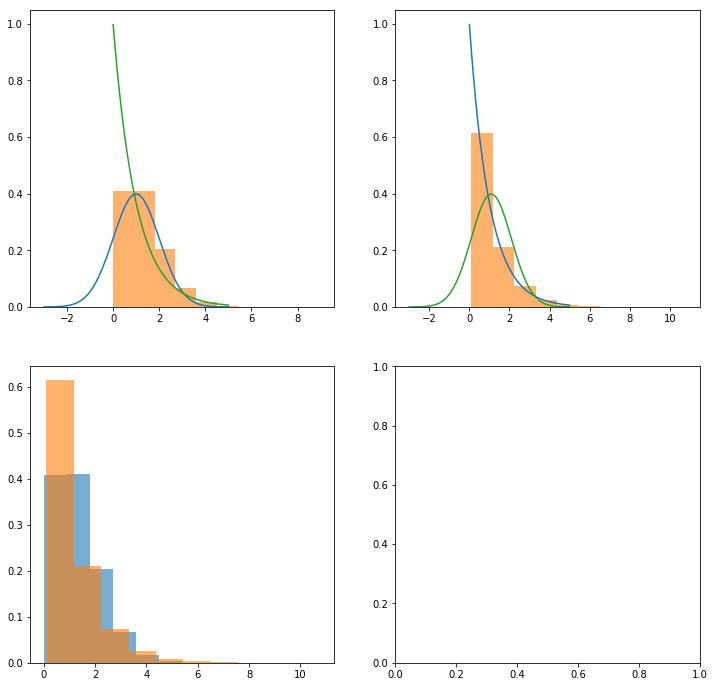

In [26]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(nu_grid,gaussian_II.pdf(nu_grid))
ax1.hist(mc_sample_III,alpha=0.6,normed=1)
ax1.plot(nu_grid,nu_posterior)

ax2.plot(nu_grid,nu_posterior)
ax2.hist(mc_sample_V, alpha=0.6, normed=1)
ax2.plot(nu_grid,gaussian_VE.pdf(nu_grid))

ax3.hist(mc_sample_III,alpha=0.6,normed=1)
ax3.hist(mc_sample_V, alpha=0.6, normed=1)

In [23]:
mu_V =np.mean(mc_sample_V)
variance_V =np.var(mc_sample_V) # equivalent to np.sqrt(np.var(mc_sampleV))
skewness_V = stat.skew(mc_sample_V)
kurtosis_V=stat.kurtosis(mc_sample_V)

print ('the moments for the MC simulatiom with log prior are:\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_V, variance_V, skewness_V, kurtosis_V))

mu_III=np.mean(mc_sample_III)
variance_III =np.var(mc_sample_III) # equivalent to np.sqrt(np.var(mc_sample_III))
skewness_III = stat.skew(mc_sample_III)
kurtosis_III=stat.kurtosis(mc_sample_III)

print ('The moments for the MC simulation with N=nu (part III):\n\tmean = %.6f,\n\t\
variance = %.6f,\n\tskewness = %.6f\n\tand kurtosis = %.6f' %(mu_III, variance_III, skewness_III, kurtosis_III))

the moments for a logarithmic prior are:
	mean = 1.476301,
	variance = 1.286191,
	skewness = 1.590571
	and kurtosis = 3.607575
The moments for a linear prior are:
	mean = 0.998935,
	variance = 0.998938,
	skewness = 0.993613
	and kurtosis = 0.953304


The theoretical moments of the posterior for a logarithmic prior:

$$
Mean \rightarrow E[\nu] = N \\
Variance \rightarrow Var[\nu] = N \\
Skewness \rightarrow \frac{2}{\sqrt{N}}
$$

The theoretical moments ofthe posterior for a linear prior:
$$
Mean \rightarrow E[\nu] = N +1 \\
Variance \rightarrow Var[\nu] = N +1 \\
Skewness \rightarrow \frac{2}{\sqrt{N +1}}
$$


#### IX

La aproximación frequentista da una probabilidad grande para nu < 0, en cambio la aproximacion bayesiana la probabilidad de encontrar nu < 0 es zero. Para ambas aproximaciones, la mean es similar.

